1. Load the image
2. Preprocess the image
3. Extract the feature
4. Select the feature
5. Encode the feature
6. Train or test the model
7. Estimate

In [ ]:
# 1. Load the image
from PIL import Image
import numpy as np

def load_image(infilename):
    img = Image.open(infilename)
    img.load()
    return np.asarray(img, dtype="int32")

# def save_image( npdata, outfilename ) :
#     img = Image.fromarray( np.asarray( np.clip(npdata,0,255), dtype="uint8"), "L" )
#     img.save( outfilename )

In [ ]:
import glob
from scipy import ndimage
import pandas as pd

path = 'data/*.jpeg'
img_name = glob.glob(path)
rgb_list = []
label_feature_list = []
for img in img_name:
    img = Image.open(img)
    reduced = img.convert("P", palette=Image.Palette.WEB) # convert to web palette (216 colors)
    palette = reduced.getpalette() # get palette as [r,g,b,r,g,b,...]
    palette = [palette[3*n:3*n+3] for n in range(256)] # group 3 by 3 = [[r,g,b],[r,g,b],...]
    color_count = [(n, palette[m]) for n,m in reduced.getcolors()]
    RGB_df = pd.DataFrame(color_count, columns = ['cnt', 'RGB']).sort_values(by = 'cnt', ascending = False).iloc[1:6]
    RGB = pd.DataFrame(RGB_df['RGB'].to_list(), columns = ['r', 'g', 'b'])
    color = RGB.mean()
    rgb_list.append(color)
    img_arr = np.asarray(img, dtype="int32")
    labeled_image, num_features = ndimage.label(img_arr)
    label_feature_list.append(num_features)

In [3]:
color_frame = pd.DataFrame(rgb_list, columns = ['r' ,'g','b'])
color_frame = color_frame.astype(float)

In [4]:
color_frame['img'] = img_name
color_frame['img_name'] = color_frame['img'].str.extract(r"\\(.*?)_")
color_frame.drop(columns = ['img'], inplace = True)
color_frame

,r,g,b,img_name
0,122.4,122.4,40.8,A10
1,122.4,122.4,40.8,A10
2,122.4,102.0,40.8,A10
3,132.6,112.2,30.6,A10
4,132.6,112.2,30.6,A10
...,...,...,...,...
8984,132.6,112.2,30.6,C9
8985,132.6,112.2,30.6,C9
8986,132.6,112.2,30.6,C9
8987,132.6,112.2,30.6,C9


In [5]:
color_frame = color_frame.groupby(by=["img_name"]).mean().reset_index()
color_frame

,img_name,r,g,b
0,A1,139.332,115.872,28.152
1,A10,129.540,114.852,33.660
2,A11,148.716,124.338,30.396
3,A12,146.166,122.502,31.110
4,A13,167.076,131.478,31.722
...,...,...,...,...
85,C5,162.996,117.504,27.234
86,C6,153.102,120.564,35.802
87,C7,145.248,118.320,37.026
88,C8,129.132,108.834,41.310


In [6]:
label = pd.DataFrame(label_feature_list, columns = ['label_feature']) 
label['img'] = img_name
label['img_name'] = label['img'].str.extract(r"\\(.*?)_")
label.drop(columns = ['img'], inplace = True)
label

,label_feature,img_name
0,90,A10
1,110,A10
2,115,A10
3,110,A10
4,89,A10
...,...,...
8984,69,C9
8985,68,C9
8986,64,C9
8987,80,C9


In [7]:
label = label.groupby(by=["img_name"]).mean().reset_index()
label

,img_name,label_feature
0,A1,98.74
1,A10,94.41
2,A11,93.47
3,A12,90.28
4,A13,94.77
...,...,...
85,C5,71.06
86,C6,75.05
87,C7,77.35
88,C8,74.59


In [9]:
data = pd.read_excel('data/acid.xlsx')
data.head()

,Name,p,C NaOH,Khối lượng(g),Đường kính ngang(mm),Đường kính dọc(mm),Độ đường (Brix %),TA (%),Brix:TA,BrmTA
0,A1,1.9,0.4000,255,257,262,10.9,4.867141,2.239508,6.032859
1,A2,1.2,0.4000,325,288,278,9.8,3.073984,3.188045,6.726016
2,A3,2.3,0.4000,185,235,237,11.0,5.891803,1.867001,5.108197
3,A4,1.4,0.4128,203,245,245,9.0,3.701077,2.431725,5.298923
4,A5,1.2,0.4000,229,253,249,10.9,3.073984,3.545887,7.826016


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Name                  81 non-null     object 
 1   p                     81 non-null     float64
 2   C NaOH                81 non-null     float64
 3   Khối lượng(g)         81 non-null     int64  
 4   Đường kính ngang(mm)  81 non-null     int64  
 5   Đường kính dọc(mm)    81 non-null     int64  
 6   Độ đường (Brix %)     81 non-null     float64
 7   TA (%)                81 non-null     float64
 8   Brix:TA               81 non-null     float64
 9   BrmTA                 81 non-null     float64
dtypes: float64(6), int64(3), object(1)
memory usage: 6.5+ KB


In [11]:
data = data.merge(color_frame, how = 'left', left_on = 'Name', right_on = 'img_name')

In [ ]:
data = data.merge(label, how = 'left', left_on = 'Name', right_on = 'img_name')

In [13]:
data

,Name,p,C NaOH,Khối lượng(g),Đường kính ngang(mm),Đường kính dọc(mm),Độ đường (Brix %),TA (%),Brix:TA,BrmTA,img_name_x,r,g,b,img_name_y,label_feature
0,A1,1.90,0.4000,255,257,262,10.9,4.867141,2.239508,6.032859,A1,139.332000,115.872000,28.152000,A1,98.740000
1,A2,1.20,0.4000,325,288,278,9.8,3.073984,3.188045,6.726016,A2,147.213462,120.732692,33.934615,A2,94.298077
2,A3,2.30,0.4000,185,235,237,11.0,5.891803,1.867001,5.108197,A3,160.854000,129.030000,33.966000,A3,69.520000
3,A4,1.40,0.4128,203,245,245,9.0,3.701077,2.431725,5.298923,A4,158.814000,130.866000,30.906000,A4,82.210000
4,A5,1.20,0.4000,229,253,249,10.9,3.073984,3.545887,7.826016,A5,144.636000,118.422000,36.414000,A5,93.710000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,C24,1.60,0.4016,177,225,216,12.5,4.115040,3.037638,8.384960,C24,140.352000,115.974000,34.068000,C24,76.920000
77,C25,1.60,0.4016,173,216,220,11.1,4.115040,2.697422,6.984960,C25,149.226000,119.544000,35.802000,C25,74.790000
78,C26,0.95,0.4016,126,195,197,12.8,2.443305,5.238806,10.356695,C26,131.682000,110.058000,31.620000,C26,72.620000
79,C28,1.70,0.4016,181,216,232,11.8,4.372230,2.698852,7.427770,C28,143.106000,117.300000,35.496000,C28,77.030000


In [14]:
data.drop(columns = ['img_name_x','img_name_y'], inplace = True)

In [15]:
data

,Name,p,C NaOH,Khối lượng(g),Đường kính ngang(mm),Đường kính dọc(mm),Độ đường (Brix %),TA (%),Brix:TA,BrmTA,r,g,b,label_feature
0,A1,1.90,0.4000,255,257,262,10.9,4.867141,2.239508,6.032859,139.332000,115.872000,28.152000,98.740000
1,A2,1.20,0.4000,325,288,278,9.8,3.073984,3.188045,6.726016,147.213462,120.732692,33.934615,94.298077
2,A3,2.30,0.4000,185,235,237,11.0,5.891803,1.867001,5.108197,160.854000,129.030000,33.966000,69.520000
3,A4,1.40,0.4128,203,245,245,9.0,3.701077,2.431725,5.298923,158.814000,130.866000,30.906000,82.210000
4,A5,1.20,0.4000,229,253,249,10.9,3.073984,3.545887,7.826016,144.636000,118.422000,36.414000,93.710000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,C24,1.60,0.4016,177,225,216,12.5,4.115040,3.037638,8.384960,140.352000,115.974000,34.068000,76.920000
77,C25,1.60,0.4016,173,216,220,11.1,4.115040,2.697422,6.984960,149.226000,119.544000,35.802000,74.790000
78,C26,0.95,0.4016,126,195,197,12.8,2.443305,5.238806,10.356695,131.682000,110.058000,31.620000,72.620000
79,C28,1.70,0.4016,181,216,232,11.8,4.372230,2.698852,7.427770,143.106000,117.300000,35.496000,77.030000


In [ ]:
numerical_cols = ['Khối lượng(g)', 'Đường kính ngang(mm)',
                'Đường kính dọc(mm)',
                'r', 'g', 'b']
data[numerical_cols].describe()

,Khối lượng(g),Đường kính ngang(mm),Đường kính dọc(mm),r,g,b
count,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000
mean,222.197531,241.777778,241.358025,142.794432,115.950470,34.278817
std,50.582215,23.652167,22.587225,13.006913,9.594816,3.729267
min,126.000000,195.000000,197.000000,117.096000,87.924000,23.256000
25%,179.000000,222.000000,223.000000,133.824000,112.302000,31.722000
50%,228.000000,242.000000,242.000000,140.454000,115.974000,34.068000
75%,255.000000,257.000000,255.000000,152.082000,121.278000,36.414000
max,357.000000,305.000000,290.000000,181.254000,132.600000,41.310000


In [ ]:
# Đếm số giá trị riêng biệt trong biến định lượng
distincts = []
percents = []
for numerical_col in numerical_cols:
  distinct = data[numerical_col].nunique()
  percent = distinct*100/data.shape[0]
  print(numerical_col, 'column has', distinct,'distinct values')
  print('It takes', format(percent,'.2f'),'%')
  print('---')
  distincts.append(distinct)
  percents.append(format(percent,'.2f')+'%')

Khối lượng(g) column has 61 distinct values
It takes 75.31 %
---
Đường kính ngang(mm) column has 50 distinct values
It takes 61.73 %
---
Đường kính dọc(mm) column has 47 distinct values
It takes 58.02 %
---
r column has 75 distinct values
It takes 92.59 %
---
g column has 72 distinct values
It takes 88.89 %
---
b column has 65 distinct values
It takes 80.25 %
---


,Count Distinct,Take Percent
Khối lượng(g),61,75.31%
Đường kính ngang(mm),50,61.73%
Đường kính dọc(mm),47,58.02%
r,75,92.59%
g,72,88.89%
b,65,80.25%


In [ ]:
dt = {'Count Distinct': distincts,'Take Percent':percents}

In [ ]:
pd.DataFrame (data = dt, index = numerical_cols)

In [18]:
# Visualize data
from sklearn import linear_model

# Khối lượng
x1 = data['Khối lượng(g)'].T

# Đường kính ngang
x2 = data['Đường kính ngang(mm)'].T

# Đường kính dọc
x3 = data['Đường kính dọc(mm)'].T

X = np.concatenate([x1, x2, x3])

# Độ đường
y = data['Độ đường (Brix %)'].T
print(y)

0     10.9
1      9.8
2     11.0
3      9.0
4     10.9
      ... 
76    12.5
77    11.1
78    12.8
79    11.8
80    12.3
Name: Độ đường (Brix %), Length: 81, dtype: float64


<Axes: xlabel='Khối lượng(g)', ylabel='Độ đường (Brix %)'>

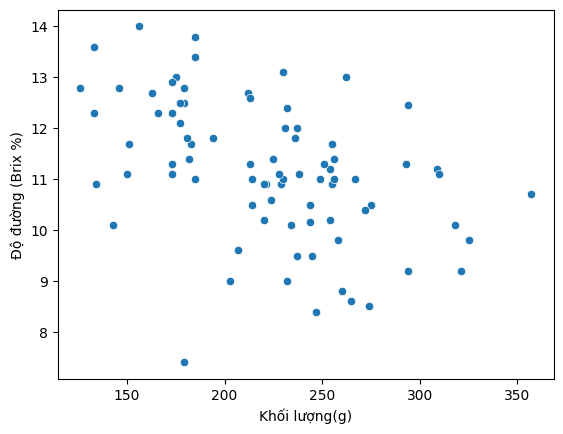

In [22]:
import seaborn as sns
sns.scatterplot(x=data['Khối lượng(g)'],y=data['Độ đường (Brix %)'])

### 2. Feature Selection:
- Choose features to train ML model

In [23]:
data.columns

Index(['Name', 'p', 'C NaOH', 'Khối lượng(g)', 'Đường kính ngang(mm)',
       'Đường kính dọc(mm)', 'Độ đường (Brix %)', 'TA (%)', 'Brix:TA', 'BrmTA',
       'r', 'g', 'b', 'label_feature'],
      dtype='object')

In [24]:
features = ['Khối lượng(g)', 'Đường kính ngang(mm)',
            'Đường kính dọc(mm)',
            'r', 'g', 'b']

In [25]:
X = data[features]
y = data['Độ đường (Brix %)']

In [26]:
X.head()

,Khối lượng(g),Đường kính ngang(mm),Đường kính dọc(mm),r,g,b
0,255,257,262,139.332000,115.872000,28.152000
1,325,288,278,147.213462,120.732692,33.934615
2,185,235,237,160.854000,129.030000,33.966000
3,203,245,245,158.814000,130.866000,30.906000
4,229,253,249,144.636000,118.422000,36.414000


In [27]:
y.head()

0    10.9
1     9.8
2    11.0
3     9.0
4    10.9
Name: Độ đường (Brix %), dtype: float64

In [48]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2)

In [57]:
X_train

,Khối lượng(g),Đường kính ngang(mm),Đường kính dọc(mm),r,g,b
72,143,206,207,135.762000,113.730000,31.824000
4,229,253,249,144.636000,118.422000,36.414000
45,225,238,237,140.658000,115.362000,34.680000
24,265,268,278,138.312000,115.974000,34.578000
55,237,247,244,132.396000,111.792000,30.396000
...,...,...,...,...,...,...
9,275,267,270,148.716000,124.338000,30.396000
30,249,248,247,162.486000,126.786000,36.414000
31,213,234,235,131.172000,110.772000,33.048000
53,194,232,233,119.442000,92.514000,33.966000


In [50]:
print(X_train.shape, data.shape, X_valid.shape)

(64, 6) (81, 14) (17, 6)


In [51]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,accuracy_score,r2_score
from math import sqrt

# creating the model
lrmodel = LinearRegression()

# feeding the training data to the model
lrmodel.fit(X_train, y_train)

# predicting the test set results
y_pred = lrmodel.predict(X_valid)

# calculating the mean squared error
MSE = mean_squared_error(y_valid, y_pred)
print('MSE: ', MSE)

# Calculating the root mean squared error
RMSE = sqrt(mean_squared_error(y_valid, y_pred))       
print('RMSE: ', RMSE)

# Calculating the r2 score
R2 = r2_score(y_valid, y_pred)
print('R2 :', R2)

MSE:  1.5590027731380538
RMSE:  1.2486003256198734
R2 : 0.17806516083461477


In [52]:
from sklearn.svm import SVR

# creating the model
svrmodel = SVR()

# feeding the training data to the model
svrmodel.fit(X_train, y_train)

# predicting the test set results
y_pred = svrmodel.predict(X_valid)

# calculating the mean squared error
MSE = mean_squared_error(y_valid, y_pred)
print('MSE: ', MSE)

# Calculating the root mean squared error
RMSE = sqrt(mean_squared_error(y_valid, y_pred))       
print('RMSE: ', RMSE)

# Calculating the r2 score
R2 = r2_score(y_valid, y_pred)
print('R2 :', R2)

MSE:  1.5672416771671966
RMSE:  1.2518952341019582
R2 : 0.17372145960792496


In [53]:
from sklearn.tree import DecisionTreeRegressor

# creating the model
dtrmodel = DecisionTreeRegressor()

# feeding the training data to the model
dtrmodel.fit(X_train, y_train)

# predicting the test set results
y_pred = dtrmodel.predict(X_valid)

# calculating the mean squared error
MSE = mean_squared_error(y_valid, y_pred)
print('MSE: ', MSE)

# Calculating the root mean squared error
RMSE = sqrt(mean_squared_error(y_valid, y_pred))       
print('RMSE: ', RMSE)

# Calculating the r2 score
R2 = r2_score(y_valid, y_pred)
print('R2 :', R2)

MSE:  3.5972058823529403
RMSE:  1.8966301385227802
R2 : -0.8965128794512547


In [54]:
from sklearn.ensemble import RandomForestRegressor

# creating the model
rfrmodel = RandomForestRegressor(n_jobs = -1)

# feeding the training data to the model
rfrmodel.fit(X_train, y_train)

# predicting the test set results
y_pred = rfrmodel.predict(X_valid)

# calculating the mean squared error
MSE = mean_squared_error(y_valid, y_pred)
print('MSE: ', MSE)

# Calculating the root mean squared error
RMSE = sqrt(mean_squared_error(y_valid, y_pred))
print('RMSE: ', RMSE)

# Calculating the r2 score
R2 = r2_score(y_valid, y_pred)
print('R2:', R2)

MSE:  1.5209171264705912
RMSE:  1.2332546884040585
R2: 0.19814461188339005
